<a href="https://colab.research.google.com/github/YasuharuSuzuki/25_isco3/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03_LinearRegressionによる回帰モデルの学習・評価
- 「データ前処理」で保存したデータを読み込み、LinearRegressionでモデルを学習・評価してみましょう。

---

### 🌐 参考サイト
#### [【Python入門】7-2. scikit-learnライブラリ](https://utokyo-ipp.github.io/7/7-2.html)

---
---

### ⬇️ ライブラリのインストール

In [ ]:
# matplotlib日本語対応ライブラリのインストール
!pip install matplotlib-fontja

### 📁 GoogleDrive の Mount

In [ ]:
# drive.mount()を使用してGoogleDriveをMount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# os.chdir()を使用してカレントディレクトリを変更。作成したショーットカット名を使ってパスを指定します。
import os
os.chdir('/content/drive/MyDrive/＜作成したショートカット名＞')

### ➜]　ライブラリのimport

In [1]:
import numpy as np # 数値演算ライブラリ
import pandas as pd # データ分析ライブラリ
import matplotlib.pyplot as plt # 可視化ライブラリ
import seaborn as sns # 可視化ライブラリ
import joblib # モデル保存・読み込みライブラリ
from sklearn.preprocessing import LabelEncoder # 文字データを数字に置換するクラス（後述）
from sklearn.model_selection import train_test_split # scikit-learnの訓練データ / テストデータ 分割関数
from sklearn import linear_model # scikit-learnのlinear_modelライブラリ
from sklearn.ensemble import RandomForestRegressor  # RandomForestRegressor (回帰モデル)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # 回帰モデルの性能評価用関数

### ✍️ 定数の定義
- データファイルパスを定義しておきます
- データ読み込み・データ書き込みの際に使用してください。修正は不要です

In [2]:
# 前処理後の出力ファイルパス定義
TIPS_PREPROCESSED_CSV = "./data/tips_preprocessed.csv"
MEDICAL_PREPROCESSED_CSV = "./data/medical_preprocessed.csv"

# RANDOM SEED 定義
RANDOM_SEED = 0

---
---
---

### ✎ サンプルプログラム7　LinearRegressionによる回帰モデルの学習

以下の手順で、チップ額の回帰モデルを学習します。
- 前処理済みのチップ額データセットをDataFrameに読み込む(TIPS_PREPROCESSED_CSVで定義済みのファイル名を使用する)
- 訓練データとテストデータに分割する
- LinearRegressionを用いて回帰モデルを学習する

In [3]:
# 前処理済みのデータセットを読み込む
df_tips = pd.read_csv(TIPS_PREPROCESSED_CSV, index_col=0) # 0番の列をindexに使用するため、index_col=0を指定します

# 説明変数と目的変数に分ける
X_tips = df_tips.iloc[:,:-1]
y_tips = df_tips.iloc[:,-1]

# 訓練データとテストデータに分割する
X_train_tips, X_test_tips, y_train_tips, y_test_tips = train_test_split(X_tips, y_tips, test_size=0.3, random_state=RANDOM_SEED)

In [4]:
# LinearRegressionで学習させる
ln_model_tips = linear_model.LinearRegression()    # 回帰モデルを作る
ln_model_tips.fit(X_train_tips, y_train_tips)    # 訓練する

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


---

### ∿ 練習プログラム7　LinearRegressionによる回帰モデルの学習 (5点)

以下の手順で、医療保険料の回帰モデルを学習しましょう。  
1️⃣ 前処理済みの医療保険料データセットをDataFrameに読み込む(MEDICAL_PREPROCESSED_CSVで定義済みのファイル名を使用する)  
2️⃣ 訓練データとテストデータに分割する  
3️⃣ LinearRegressionを用いて回帰モデルを学習する  

<!-- PROBLEM_TYPE: SYNTAX_EXERCISE -->

In [ ]:
# 前処理済みの医療保険料データセットを読み込む

# 説明変数と目的変数に分ける

# 訓練データとテストデータに分割する


In [ ]:
# LinearRegressionで学習する


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
#@title 送信処理用共通プログラム（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown 解答の送信に必要です。（中身は絶対に修正しないでください）

import os
os.makedirs(".client/python", exist_ok=True)  # 隠しフォルダを作成
!wget -q https://raw.githubusercontent.com/YasuharuSuzuki/25_isco3/main/91_notebook_client/src/setup.sh -O .client/setup.sh   # 外部コードをダウンロードして隠しフォルダに配置
!chmod +x ./.client/setup.sh
!bash ./.client/setup.sh # 実行

# モジュールの初期化
exec(open('.client/client_setup.py').read())

# ノートブック固有の設定
NOTEBOOK_PATH = "05_機械学習(回帰)/03_LinearRegressionによる回帰モデルの学習・評価.ipynb"
set_notebook_config(NOTEBOOK_PATH)

In [ ]:
#@title 問7 送信ボタン表示（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown メールアドレスを取得して、送信ボタンを押してください（中のプログラムは絶対に修正しないでください）
display(create_submit_button(problem_number=7, button_name="練習プログラム"))

---
---
---

### 🩺 サンプルプログラム8 エラーレートと決定係数によるモデルの評価

- エラーレートは小さいほど良いモデル、決定係数は1に近づくほど良いモデルとなります。
- 各種エラーレートと決定係数の数式は以下の通りです
### Mean Absolute Error (MAE)
$$
MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$

### Mean Squared Error (MSE)
$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

### Root Mean Squared Error (RMSE)
$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
$$

### 決定係数 (R^2)
$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

ここで、

- $n$ はサンプル数
- $y_i$ は実際の値
- $\hat{y}_i$ は予測値
- $\bar{y}$ は $y$ の平均値

です。

In [9]:
# エラーレートと決定係数の算出を行うユーザー定義関数
def evaluate_metrics(y_train, y_test, y_train_pred, y_test_pred):
    # 学習時スコア
    train_MAE = mean_absolute_error(y_train, y_train_pred)
    train_MSE = mean_squared_error(y_train, y_train_pred)
    train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_R2 = r2_score(y_train, y_train_pred)
    
    # テスト時スコア
    test_MAE = mean_absolute_error(y_test, y_test_pred)
    test_MSE = mean_squared_error(y_test, y_test_pred)
    test_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_R2 = r2_score(y_test, y_test_pred)
    
    print("学習時スコア(train score)")
    print("　平均絶対誤差: ", train_MAE)
    print("　平均二乗誤差: ", train_MSE)
    print("　二乗平均平方根誤差: ", train_RMSE)
    print("　決定係数R^2: ", train_R2)
    
    print("テストスコア(test score)")
    print("　平均絶対誤差: ", test_MAE)
    print("　平均二乗誤差: ", test_MSE)
    print("　二乗平均平方根誤差: ", test_RMSE)
    print("　決定係数R^2: ", test_R2)

In [10]:
y_train_tips_pred = ln_model_tips.predict(X_train_tips)  # 学習データを使って推論する
y_test_tips_pred = ln_model_tips.predict(X_test_tips)  # テストデータを使って推論する

# エラーレートと決定係数の算出を行うユーザー定義関数の呼び出し
evaluate_metrics(y_train_tips, y_test_tips, y_train_tips_pred, y_test_tips_pred)

学習時スコア(train score)
　平均絶対誤差:  0.7137993872174282
　平均二乗誤差:  1.0337921374430246
　二乗平均平方根誤差:  1.016755692112429
　決定係数R^2:  0.47442630182567125
テストスコア(test score)
　平均絶対誤差:  0.7562584972464621
　平均二乗誤差:  0.9787014923658398
　二乗平均平方根誤差:  0.9892934308716701
　決定係数R^2:  0.46849263257037244


---

### 🔎 練習プログラム8 エラーレートと決定係数によるモデルの評価 (5点)

1️⃣ 医療保険料の学習済み回帰モデルを使用して推論し、エラーレートと決定係数を確認してみましょう。  
  - ※定義済みの evaluate_metrics() 関数を呼び出しましょう。  

2️⃣ 考察も記載してみましょう。  

<!-- PROBLEM_TYPE: SYNTAX_EXERCISE -->
<!-- evaluate_metrics()ではエラーレートと決定係数の算出・print出力を行っています。 -->

In [ ]:
# 学習データを使って推論する
# テストデータを使って推論する

# エラーレートと決定係数の算出を行うユーザー定義関数の呼び出し

# 考察：こちらにソースコメントで考察を記述して下さい。
# コードセルに書かれたコメントを読み取って採点していますので、マークダウンには書かないでください。
# 指標名（MAE / RMSE / R^2）を明示し、具体的な数値を交えて、数値 → 解釈 → 結論の流れで記載してください。

学習時スコア(train score)
　平均絶対誤差:  4083.318126759867
　平均二乗誤差:  35893718.22884497
　二乗平均平方根誤差:  5991.136639139936
　決定係数R^2:  0.7504997864561738
テストスコア(test score)
　平均絶対誤差:  4216.634517816242
　平均二乗誤差:  37948491.728583045
　二乗平均平方根誤差:  6160.234713757508
　決定係数R^2:  0.752836374477272


In [ ]:
#@title 問8 送信ボタン表示（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown メールアドレスを取得して、送信ボタンを押してください（中のプログラムは絶対に修正しないでください）
display(create_submit_button(problem_number=8, button_name="練習プログラム"))

---
---
---

### 🌘 サンプルプログラム9 残差の可視化

- 残差とは実際の値と回帰モデルによる予測値との差のことです  
- チップ額について、X軸を実際の値、y軸を予測値とし、残差0の直線を引いてどの程度実際の値と予測値でズレがあるのかを可視化します  

In [16]:
# 残差の可視化を行うユーザー定義関数
def residual_plot(y_column_name, y_train, y_test, y_train_pred, y_test_pred):
    df_train = pd.DataFrame(y_train)
    df_train['y_train_pred'] = y_train_pred
    
    df_test = pd.DataFrame(y_test)
    df_test['y_test_pred'] = y_test_pred
    
    ax = plt.gca()
    
    # 傾き1の直線を追加
    a_line=[min(df_train[y_column_name].min(), df_test[y_column_name].min()), max(df_train[y_column_name].max(), df_test[y_column_name].max())]
    sns.regplot(x=df_train[y_column_name], y=df_train['y_train_pred'],label='train')
    sns.regplot(x=df_test[y_column_name], y=df_test['y_test_pred'],label='test')
    sns.regplot(x=a_line, y=a_line,ci=None, scatter=False, line_kws={'color': 'orange', 'linestyle': '--', 'lw': 1},label='residual 0')
    
    ax.set_xlabel('true')
    ax.set_ylabel('pred')
    
    plt.legend(fontsize=10)
    plt.show()

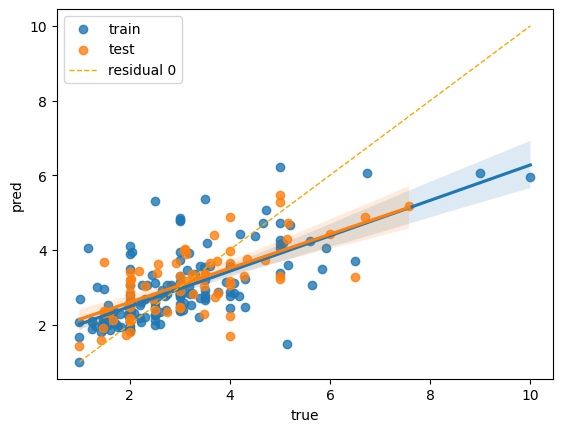

In [17]:
# 残差の可視化を行うユーザー定義関数を呼び出す
residual_plot('tip', y_train_tips, y_test_tips, y_train_tips_pred, y_test_tips_pred)

### 考察
- tip値の大きな学習データが疎らに分布しており、わずかなデータ量の増減によって大きく影響が出そうである
  - \\$10 や \\$9 の学習データは比較的残差０の直線に近いが、\\$6～\\$7.5あたりの残差が大きく、データ量不足が伺える
  - この差はデータ量を増やさないと難しいように思う
- 学習とテストではあまり差異が発生していない
  - テストの残差は学習時と同様の傾向となっており、それほど過学習はしていないように見える

---

### 🏟️ 練習プログラム9 残差の可視化 (5点)

1️⃣ 医療保険料について、残差を可視化してみましょう。  
  - ※定義済みの residual_plot() 関数を呼び出しましょう。  

2️⃣ 考察を記載してみましょう。  

<!-- PROBLEM_TYPE: SYNTAX_EXERCISE -->
<!-- residual_plot() では X軸を実際の値、y軸を予測値とし、残差0の直線を引いてどの程度実際の値と予測値でズレがあるのかを可視化しています   -->

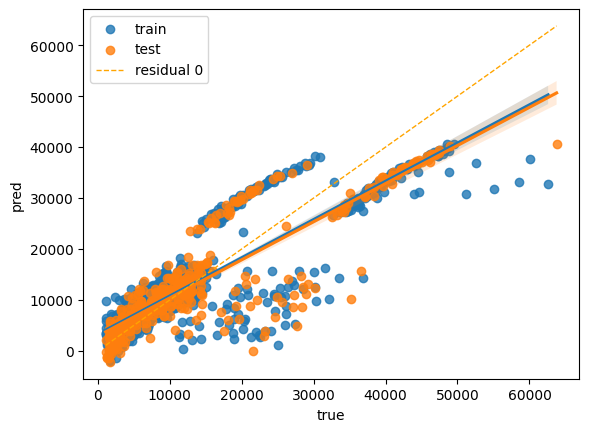

In [ ]:
# 残差の可視化を行うユーザー定義関数を呼び出す


# 考察：こちらにソースコメントで考察を記述して下さい。
# コードセルに書かれたコメントを読み取って採点していますので、マークダウンには書かないでください。

In [ ]:
#@title 問9 送信ボタン表示（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown メールアドレスを取得して、送信ボタンを押してください（中のプログラムは絶対に修正しないでください）
display(create_submit_button(problem_number=9, button_name="練習プログラム"))